# Data Analysis and Visualization


Import libraries we can use to analysis and visualization

In [3]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt


load the dataset cleaned 

In [5]:
cars_sales = pd.read_csv("../Milestone1/Car_sales_CleanData.csv", index_col=0)
cars_sales.head()

,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,DayOfWeek,Season
Date,,,,,,,,,,,,,,,,,,
2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,1,6,Winter
2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,1,6,Winter
2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,1,6,Winter
2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,1,6,Winter
2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,1,6,Winter


In [6]:
cars_sales.tail()

,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,Month,DayOfWeek,Season
Date,,,,,,,,,,,,,,,,,,
2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,2023,12,6,Winter
2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,2023,12,6,Winter
2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,2023,12,6,Winter
2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,2023,12,6,Winter
2023-12-31,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown,2023,12,6,Winter


Descriptive Statistics

In [7]:
print(cars_sales.describe())

       Annual Income     Price ($)         Phone          Year         Month  \
count   2.390600e+04  23906.000000  2.390600e+04  23906.000000  23906.000000   
mean    8.308403e+05  28090.247846  7.497741e+06   2022.554714      7.852924   
std     7.200064e+05  14788.687608  8.674920e+05      0.497008      3.257985   
min     1.008000e+04   1200.000000  6.000101e+06   2022.000000      1.000000   
25%     3.860000e+05  18001.000000  6.746495e+06   2022.000000      5.000000   
50%     7.350000e+05  23000.000000  7.496198e+06   2023.000000      9.000000   
75%     1.175750e+06  34000.000000  8.248146e+06   2023.000000     11.000000   
max     1.120000e+07  85800.000000  8.999579e+06   2023.000000     12.000000   

          DayOfWeek  
count  23906.000000  
mean       2.963649  
std        2.173882  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  


### Check for Correlations
-Analyze relationships between numerical variables using a correlation matrix:

Filter numerical columns and Drop Irrelevant Numerical Columns


In [10]:
# Filter only numerical columns
numerical_data = cars_sales.select_dtypes(include=['number'])

# Replace 'Phone' with the irrelevant column name
numerical_data = numerical_data.drop(['Phone'], axis=1) 

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()
print(correlation_matrix)



               Annual Income  Price ($)      Year     Month  DayOfWeek
Annual Income       1.000000   0.012065 -0.031406 -0.015141  -0.003108
Price ($)           0.012065   1.000000 -0.007511  0.006856  -0.000368
Year               -0.031406  -0.007511  1.000000 -0.023009   0.017541
Month              -0.015141   0.006856 -0.023009  1.000000   0.035593
DayOfWeek          -0.003108  -0.000368  0.017541  0.035593   1.000000


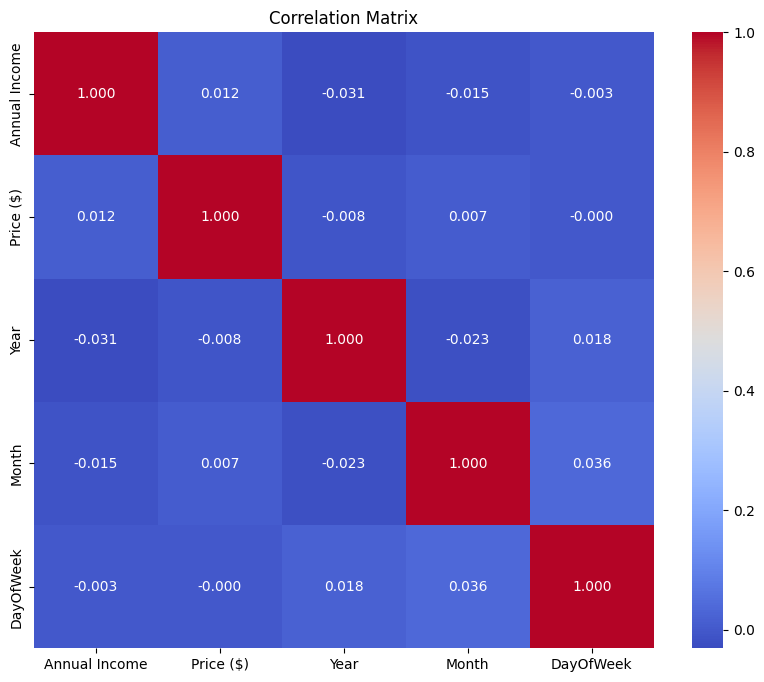

In [12]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()